<a href="https://colab.research.google.com/github/cfreeman22/D213/blob/main/d213_task2_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import json
import gzip
import pandas as pd
 

In [3]:
#reading the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/My Drive/Software.json.gz'


In [1]:
def extract_data_from_gzip_json(filepath):
    """
    Extracts data from a json file contained in a gzip and loads it into a pandas DataFrame.

    Parameters:
        filepath (str): Path to the gzip file containing the json.

    Returns:
        df (pd.DataFrame): Pandas DataFrame containing the data from the json.
    """
    data = []
    with gzip.open(filepath, 'rt', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line))
    df = pd.DataFrame(data)
    return df


In [5]:
data = extract_data_from_gzip_json(file_path)

In [12]:
data.iloc[0]

overall                                                         4.0
verified                                                       True
reviewTime                                              03 11, 2014
reviewerID                                           A240ORQ2LF9LUI
asin                                                     0077613252
style                                    {'Format:': ' Loose Leaf'}
reviewerName                                             Michelle W
reviewText        The materials arrived early and were in excell...
summary                                              Material Great
unixReviewTime                                           1394496000
vote                                                            NaN
image                                                           NaN
Name: 0, dtype: object

In [13]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

# Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         
import seaborn as sns
import matplotlib.pyplot as plt


# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 7.5 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
data.shape 

(459436, 12)

In [15]:
data.isnull().sum(axis=0)          # Check for NULL values.

overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
style             225035
reviewerName          24
reviewText            66
summary               56
unixReviewTime         0
vote              331583
image             457928
dtype: int64

In [16]:
# check the missing values for all the columns
def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

#plot the count of missing values in every column 
def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='darkgrid')
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.title('Bar plot for Null Values in each column')
    plt.xticks(rotation=90)
    plt.show()

In [17]:
# get the count of missing values in every column of the dataframe
return_missing_values(data)

reviewerName        24
summary             56
reviewText          66
style           225035
vote            331583
image           457928
dtype: int64

In [19]:
data = data.drop(['style','vote', 'image'], axis=1)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459436 entries, 0 to 459435
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         459436 non-null  float64
 1   verified        459436 non-null  bool   
 2   reviewTime      459436 non-null  object 
 3   reviewerID      459436 non-null  object 
 4   asin            459436 non-null  object 
 5   reviewerName    459412 non-null  object 
 6   reviewText      459370 non-null  object 
 7   summary         459380 non-null  object 
 8   unixReviewTime  459436 non-null  int64  
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 28.5+ MB


In [21]:
data = data.dropna()

In [23]:
data.isnull().sum()

overall           0
verified          0
reviewTime        0
reviewerID        0
asin              0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
dtype: int64

In [24]:
data.overall.value_counts()

5.0    212365
1.0    102526
4.0     73578
3.0     39385
2.0     31442
Name: overall, dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459296 entries, 0 to 459435
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         459296 non-null  object
 1   verified        459296 non-null  bool  
 2   reviewTime      459296 non-null  object
 3   reviewerID      459296 non-null  object
 4   asin            459296 non-null  object
 5   reviewerName    459296 non-null  object
 6   reviewText      459296 non-null  object
 7   summary         459296 non-null  object
 8   unixReviewTime  459296 non-null  int64 
 9   word_count      459296 non-null  int64 
dtypes: bool(1), int64(2), object(7)
memory usage: 35.5+ MB


In [25]:
data['overall'] = data['overall'].replace({1: 'negative', 2: 'negative'})

In [26]:
data['overall'] = data['overall'].replace({4: 'positive', 5: 'positive'})

In [27]:
data['overall'] = data['overall'].replace({3: 'neutral'})

In [33]:
data['overall'] = data['overall'].astype(str)

In [28]:
data.overall.value_counts()

positive    285943
negative    133968
neutral      39385
Name: overall, dtype: int64

In [29]:
#get the no of words in every text
data['word_count'] = [len(t.split()) for t in data.reviewText]
data.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,word_count
0,positive,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,26
1,positive,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,32
2,negative,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,58
3,neutral,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,Lucy,This book was missing pages!!! Important pages...,missing pages!!,1392595200,23
4,positive,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,Albert V.,I have used LearnSmart and can officially say ...,Best study product out there!,1381708800,107


In [37]:
from wordcloud import WordCloud,STOPWORDS

In [39]:
negative_tweets=data[data['overall']=='negative']
words = ' '.join(negative_tweets['reviewText'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [40]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

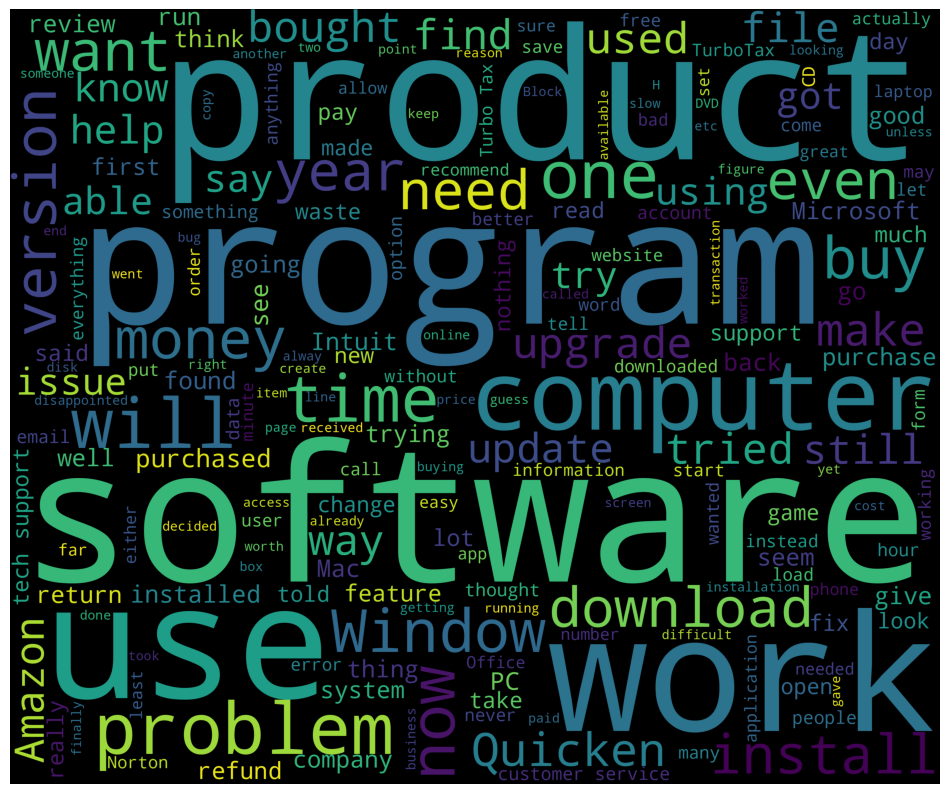

In [41]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [42]:
positive_tweets=data[data['overall']=='positive']
words = ' '.join(positive_tweets['reviewText'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [43]:
wordcloud2 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

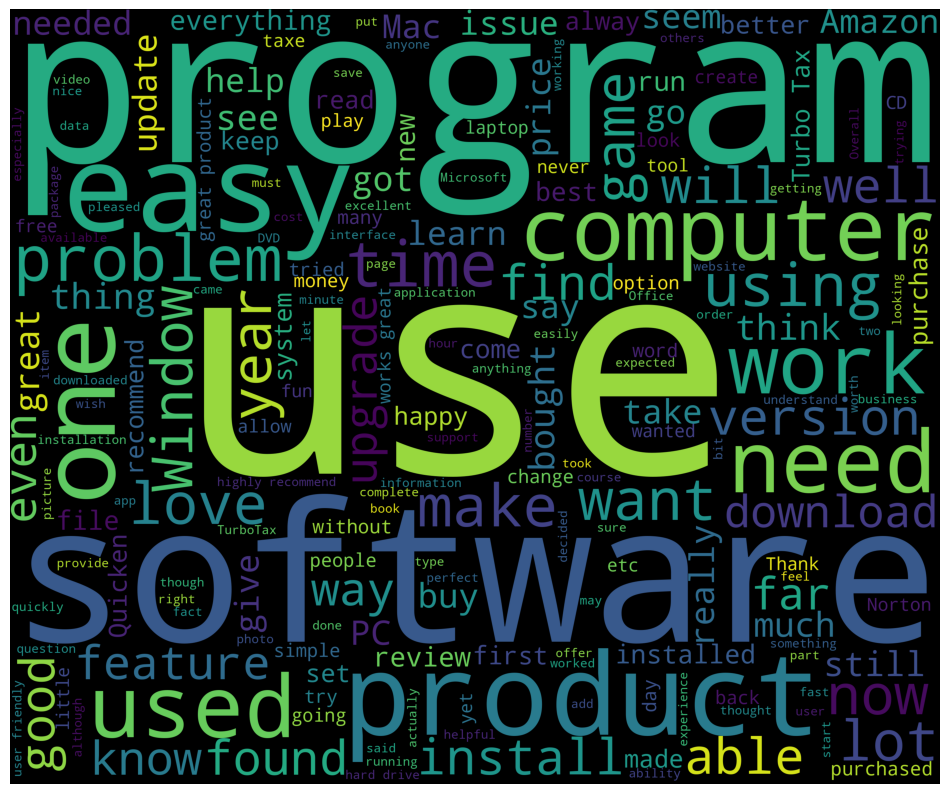

In [44]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [46]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

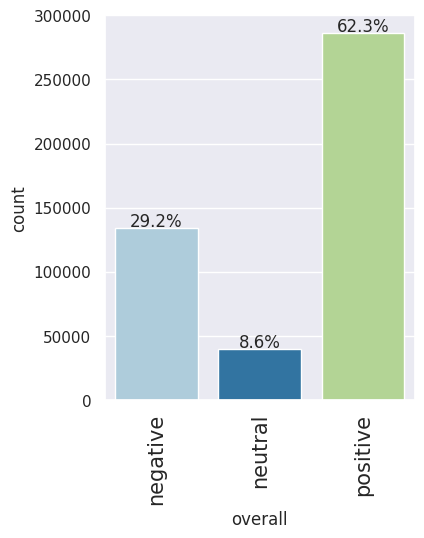

In [47]:
labeled_barplot(data, "overall", perc=True)